In [1]:
import pandas as pd

In [2]:
import_list = ["./data/la_county/redfin_2020-06-06-10-33-17.csv",  
               "./data/la_county/redfin_2020-06-06-10-34-58.csv",
               "./data/la_county/redfin_2020-06-06-10-33-30.csv",  
               "./data/la_county/redfin_2020-06-06-10-35-32.csv",
               "./data/la_county/redfin_2020-06-06-10-33-57.csv",  
               "./data/la_county/redfin_2020-06-06-10-35-43.csv",
               "./data/la_county/redfin_2020-06-06-10-34-10.csv",  
               "./data/la_county/redfin_2020-06-06-10-35-55.csv",
               "./data/la_county/redfin_2020-06-06-10-34-25.csv",  
               "./data/la_county/redfin_2020-06-06-10-36-06.csv",
               "./data/la_county/redfin_2020-06-06-10-34-38.csv",  
               "./data/la_county/redfin_2020-06-06-10-36-32.csv"]

In [3]:
df = pd.read_csv("./data/la_county/redfin_2020-06-06-10-34-50.csv")

for i in range(len(import_list)):
    df = df.append(pd.read_csv(import_list[i]))

In [4]:
df.shape

(1783, 27)

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(1405, 27)

In [6]:
df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [7]:
df['CITY'].value_counts()

Arcadia             163
Pasadena            158
Covina               81
West Covina          80
Walnut               76
El Monte             74
Alhambra             68
Hacienda Hts         65
Azusa                64
San Gabriel          59
Rowland Heights      54
Temple City          53
La Puente            53
Monrovia             50
Glendora             46
San Marino           42
Baldwin Park         38
Rosemead             32
Monterey Park        30
Montebello           30
San Dimas            19
Sierra Madre         14
Diamond Bar          12
Pico Rivera          11
South El Monte       10
Duarte                7
East Los Angeles      4
South Pasadena        3
Irwindale             3
Los Angeles           3
Charter Oak           1
Valinda               1
City Of Industry      1
Name: CITY, dtype: int64

In [8]:
keep_cols = ['PRICE', 
             'PROPERTY TYPE', 
             'CITY', 
             'ZIP OR POSTAL CODE', 
             'BEDS', 
             'BATHS',
             'SQUARE FEET',
             'LATITUDE',
             'LONGITUDE']

df = df[keep_cols]

In [9]:
df.dtypes

PRICE                   int64
PROPERTY TYPE          object
CITY                   object
ZIP OR POSTAL CODE    float64
BEDS                  float64
BATHS                 float64
SQUARE FEET           float64
LATITUDE              float64
LONGITUDE             float64
dtype: object

In [10]:
df['ZIP OR POSTAL CODE'] = df['ZIP OR POSTAL CODE'].astype('str')
df['ZIP OR POSTAL CODE'] = df['ZIP OR POSTAL CODE'].str.replace(r'\.0', '')

df['ZIP OR POSTAL CODE'].head()

0    91745
1    91745
2    91745
3    91745
4    91744
Name: ZIP OR POSTAL CODE, dtype: object

In [11]:
df.isna().sum()

PRICE                  0
PROPERTY TYPE          0
CITY                   0
ZIP OR POSTAL CODE     0
BEDS                  86
BATHS                 87
SQUARE FEET           96
LATITUDE               0
LONGITUDE              0
dtype: int64

In [12]:
df['PROPERTY TYPE'].value_counts()

Single Family Residential    856
Condo/Co-op                  182
Townhouse                    103
Multi-Family (2-4 Unit)       97
Vacant Land                   86
Mobile/Manufactured Home      46
Multi-Family (5+ Unit)        35
Name: PROPERTY TYPE, dtype: int64

In [13]:
df = df.loc[df['PROPERTY TYPE'] != 'Vacant Land', ]

df.isna().sum()

PRICE                  0
PROPERTY TYPE          0
CITY                   0
ZIP OR POSTAL CODE     0
BEDS                   0
BATHS                  1
SQUARE FEET           10
LATITUDE               0
LONGITUDE              0
dtype: int64

In [14]:
df.dropna(inplace = True)

df.shape

(1308, 9)

In [15]:
df['PRICE'].describe()

count    1.308000e+03
mean     1.277248e+06
std      1.498240e+06
min      3.499900e+04
25%      5.829975e+05
50%      8.169950e+05
75%      1.303750e+06
max      2.300000e+07
Name: PRICE, dtype: float64

In [16]:
df.loc[(df['PRICE'] > 3_000_000), 'PRICE'].count()

95

In [17]:
df.loc[df['PRICE'] == df['PRICE'].min(), ]

,PRICE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,BEDS,BATHS,SQUARE FEET,LATITUDE,LONGITUDE
60,34999,Mobile/Manufactured Home,El Monte,91732,2.0,2.0,840.0,34.048358,-118.013322


In [18]:
df.loc[df['PRICE'] == df['PRICE'].max(), ]

,PRICE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,BEDS,BATHS,SQUARE FEET,LATITUDE,LONGITUDE
246,23000000,Single Family Residential,Arcadia,91006,6.0,9.0,15000.0,34.156895,-118.023595


In [19]:
df = df.loc[(df['PRICE'] <= 3_000_000), ]

df.shape

(1213, 9)

In [20]:
df['PRICE'].describe()

count    1.213000e+03
mean     9.569641e+05
std      5.831757e+05
min      3.499900e+04
25%      5.700000e+05
50%      7.790000e+05
75%      1.188000e+06
max      3.000000e+06
Name: PRICE, dtype: float64

In [21]:
df_hdi = pd.read_csv('./data/la_county/la_county_hdi.csv')

In [22]:
df_hdi.head()

,GEO_NAME,GEO_ID,GEO_TYPE,HD_INDEX,LIFE_EXPEC,LESS_HS,BACHELORS,GRAD_DEGRE,SCHOOL_ENR,EARNINGS,HEALTH_IND,ED_INDEX,INCOME_IND
0,Northeast Los Angeles,1010,City of Los Angeles Community Plan Area,4.85,83.3,30.9,25.4,8.0,80.3,24503,7.22,4.27,3.05
1,North Hollywood - Valley Village,2130,City of Los Angeles Community Plan Area,4.92,81.6,19.9,32.8,8.4,74.1,27157,6.48,4.51,3.76
2,Central City North,1110,City of Los Angeles Community Plan Area,3.50,82.3,39.0,22.2,6.9,54.4,20909,6.77,1.79,1.95
3,Canoga Park - Winnetka - Woodland Hills - West...,2200,City of Los Angeles Community Plan Area,6.02,82.8,14.8,37.2,12.9,79.9,34243,7.00,5.69,5.37
4,Sun Valley - La Tuna Canyon,2170,City of Los Angeles Community Plan Area,4.19,82.1,33.5,17.4,4.1,77.6,22596,6.72,3.36,2.49


In [23]:
sorted(df_hdi['GEO_NAME'].unique())

['Agoura Hills',
 'Alhambra',
 'Altadena',
 'Arcadia',
 'Arleta - Pacoima',
 'Artesia',
 'Avocado Heights',
 'Azusa',
 'Baldwin Park',
 'Bel Air - Beverly Crest',
 'Bell',
 'Bell Gardens',
 'Bellflower',
 'Beverly Hills',
 'Boyle Heights',
 'Brentwood - Pacific Palisades',
 'Burbank',
 'Calabasas',
 'Canoga Park - Winnetka - Woodland Hills - West Hills',
 'Carson',
 'Castaic',
 'Central City',
 'Central City North',
 'Cerritos',
 'Chatsworth - Porter Ranch',
 'Citrus',
 'Claremont',
 'Commerce',
 'Compton',
 'Covina',
 'Cudahy',
 'Culver City',
 'Del Aire',
 'Diamond Bar',
 'Downey',
 'Duarte',
 'East Los Angeles',
 'East Rancho Dominguez',
 'East San Gabriel',
 'East Whittier',
 'El Monte',
 'El Segundo',
 'Encino - Tarzana',
 'Florence-Graham',
 'Gardena',
 'Glendale',
 'Glendora',
 'Granada Hills - Knollwood',
 'Hacienda Heights',
 'Harbor Gateway',
 'Hawaiian Gardens',
 'Hawthorne',
 'Hermosa Beach',
 'Hollywood',
 'Huntington Park',
 'Inglewood',
 'La Cañada Flintridge',
 'La Cres

In [24]:
df['City in HDI'] = df['CITY'].isin(df_hdi['GEO_NAME'].unique())

In [25]:
df.loc[df['City in HDI'] == False, 'CITY'].unique()

array(['Hacienda Hts', 'Los Angeles', 'Charter Oak', 'Irwindale'],
      dtype=object)

<br>

No data in the HDI spreadsheet for Irwindale. Since there are only 3 Irwindale listings in our dataset, we'll just take Irwindale out of our dataset. Additionally, Charter Oak in the HDI dataset is geographically split between Glendora and Covina. Since more of it resides in Covina, I will just rename the single Charter Oak listing as a Covina listing.

Hacienda Heights is an easy fix as we can change "Hacienda Hts" to match the HDI dataset's spelling (Hacienda Heights). 

In [26]:
df = df.loc[df['CITY'] != 'Irwindale', ]

In [27]:
df.loc[df['CITY'] == 'Charter Oak', 'CITY'] = 'Covina'

In [28]:
df.loc[df['CITY'] == 'Hacienda Hts', 'CITY'] = 'Hacienda Heights'

In [29]:
df.loc[df['CITY'] == 'Los Angeles', ]

,PRICE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,BEDS,BATHS,SQUARE FEET,LATITUDE,LONGITUDE,City in HDI
78,1290000,Multi-Family (5+ Unit),Los Angeles,91748,12.0,12.0,1920.0,33.974629,-117.900390,False
20,849000,Multi-Family (2-4 Unit),Los Angeles,90022,4.0,4.0,3120.0,34.015564,-118.139263,False
47,715000,Multi-Family (2-4 Unit),Los Angeles,90022,4.0,2.0,1929.0,34.014843,-118.141579,False


<br>

With manual checking of these three listings, I can easily relabel the "CITY" value to match the HDI dataset. Row 78 with a zipcode of 91748 is actually in the city of Rowland Heights, which I believe Redfin erronenously named as "Los Angeles". The remaining two listings fall in the "East Los Angeles" region of the HDI dataset, and hence all three will be renamed accordingly.

In [30]:
df.loc[(df['CITY'] == 'Los Angeles') & (df['ZIP OR POSTAL CODE'] == '90022'), 'CITY'] = 'East Los Angeles'
df.loc[(df['CITY'] == 'Los Angeles') & (df['ZIP OR POSTAL CODE'] == '91748'), 'CITY'] = 'Rowland Heights'

In [31]:
df['City in HDI'] = df['CITY'].isin(df_hdi['GEO_NAME'].unique())

df.loc[df['City in HDI'] == False, 'CITY'].unique()

array([], dtype=object)

<br>

Fantastic, now all cities in our dataset match city labels in the HDI data set as well. We can now merge in the relevant columns of the HDI data set.

In [32]:
df_hdi.rename(columns = {'GEO_NAME': 'CITY'}, inplace = True)
df_hdi.columns

Index(['CITY', 'GEO_ID', 'GEO_TYPE', 'HD_INDEX', 'LIFE_EXPEC', 'LESS_HS',
       'BACHELORS', 'GRAD_DEGRE', 'SCHOOL_ENR', 'EARNINGS', 'HEALTH_IND',
       'ED_INDEX', 'INCOME_IND'],
      dtype='object')

In [33]:
df_hdi.isna().sum()

CITY          0
GEO_ID        0
GEO_TYPE      0
HD_INDEX      0
LIFE_EXPEC    0
LESS_HS       0
BACHELORS     0
GRAD_DEGRE    0
SCHOOL_ENR    0
EARNINGS      0
HEALTH_IND    0
ED_INDEX      0
INCOME_IND    0
dtype: int64

In [34]:
df_hdi_merged = pd.merge(df,
                         df_hdi[['CITY', 'HEALTH_IND', 'ED_INDEX', 'INCOME_IND']], 
                         on = 'CITY', 
                         how = 'left')

In [35]:
df_hdi_merged.head()

,PRICE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,BEDS,BATHS,SQUARE FEET,LATITUDE,LONGITUDE,City in HDI,HEALTH_IND,ED_INDEX,INCOME_IND
0,725000,Single Family Residential,Hacienda Heights,91745,4.0,3.0,1912.0,33.994354,-117.972470,True,7.62,5.77,5.88
1,1025000,Single Family Residential,Hacienda Heights,91745,5.0,5.5,2901.0,34.004616,-117.969404,True,7.62,5.77,5.88
2,949888,Single Family Residential,Hacienda Heights,91745,5.0,3.0,3198.0,33.981565,-117.989216,True,7.62,5.77,5.88
3,418000,Condo/Co-op,Hacienda Heights,91745,2.0,1.5,1029.0,33.990939,-117.940688,True,7.62,5.77,5.88
4,499900,Single Family Residential,La Puente,91744,3.0,2.0,1428.0,34.014966,-117.925701,True,7.02,2.76,3.23


<br>

## Merging Health Properties (hprop) Spreadsheet

Need to merge in crime statistics from the third spreadsheet 

In [36]:
df_hprop = pd.read_csv('./data/la_county/la_county_health_profile.csv',
                       na_values = ['', '-', '**'])

In [37]:
df_hprop.head()

,GEONAME,Pop_Tot,Prop_18y,Prop_64y,Prop_65y+,Prop_Blk,Prop_Lat,Prop_Whi,Prop_Asi,Prop_Ami,...,Rte_mein,Rte_cein,Rte_luin,Prop_fru,Prop_bev,Prop_hyp,Prop_marj,Prop_HI,Prop_grad,Prop_trua
0,Alhambra,86705,0.1831,0.6504,0.1665,0.0133,0.3435,0.0913,0.5498,0.0014,...,NaN,NaN,34.6,0.2,0.2,0.2,0.1,0.0,1.0,0.1
1,Altadena,42525,0.2072,0.6221,0.1707,0.2374,0.2905,0.4129,0.0553,0.0019,...,33.8,NaN,35.3,0.1,0.3,0.3,0.2,0.1,0.9,0.4
2,Arcadia,56992,0.1794,0.6389,0.1817,0.0115,0.1250,0.2304,0.6315,0.0014,...,22.0,NaN,29.5,0.1,0.2,0.2,0.0,0.0,1.0,0.1
3,Azusa,49479,0.2507,0.6538,0.0956,0.0292,0.6838,0.1938,0.0895,0.0024,...,NaN,NaN,29.7,0.1,0.4,0.2,0.1,0.0,0.9,0.0
4,Baldwin Park,74438,0.2623,0.6330,0.1047,0.0099,0.7934,0.0432,0.1514,0.0012,...,NaN,NaN,26.5,0.1,0.4,0.3,0.1,0.0,1.0,0.4


In [38]:
df_hdi_merged['City in hprop'] = df_hdi_merged['CITY'].isin(df_hprop['GEONAME'].unique())
df_hdi_merged.loc[df_hdi_merged['City in hprop'] == False, 'CITY'].unique()

array(['South El Monte', 'San Marino', 'Sierra Madre', 'Duarte'],
      dtype=object)

In [39]:
df_hdi_merged['CITY'].isin(['South El Monte', 'San Marino', 'Sierra Madre', 'Duarte']).sum()

45

<br>

These four cities are not included in the hprop dataset for some reason. After checking the names of the cities included in the hprop dataset, we are sure that these cities are actually not included (as opposed to our previous situation of having cities labeled differently/incorrectly).

Because of this, we will either need to drop all listings that belong in these four cities or figure out a way to fill in the missing values. Because these four listings actually comprise a good number of listings (45, to be exact), we do not want to simply remove them. As an alternative, we will do some missing value imputing.

In [40]:
sorted(df_hprop['GEONAME'].unique())

['Alhambra',
 'Altadena',
 'Arcadia',
 'Azusa',
 'Baldwin Park',
 'Bell',
 'Bell Gardens',
 'Bellflower',
 'Beverly Hills',
 'Burbank',
 'Calabasas',
 'Carson',
 'Cerritos',
 'Claremont',
 'Compton',
 'Covina',
 'Cudahy',
 'Culver City',
 'Diamond Bar',
 'Downey',
 'East Los Angeles',
 'El Monte',
 'Florence-Graham',
 'Gardena',
 'Glendale',
 'Glendora',
 'Hacienda Heights',
 'Hawthorne',
 'Huntington Park',
 'Inglewood',
 'La Mirada',
 'La Puente',
 'La Verne',
 'Lakewood',
 'Lancaster',
 'Lawndale',
 'Long Beach',
 'Los Angeles Council District  1',
 'Los Angeles Council District  2',
 'Los Angeles Council District  3',
 'Los Angeles Council District  4',
 'Los Angeles Council District  5',
 'Los Angeles Council District  6',
 'Los Angeles Council District  7',
 'Los Angeles Council District  8',
 'Los Angeles Council District  9',
 'Los Angeles Council District 10',
 'Los Angeles Council District 11',
 'Los Angeles Council District 12',
 'Los Angeles Council District 13',
 'Los Ange

<br>

### K-NN Imputation for Missing Values

I want to merge in this third dataset in order to get data regarding crime rates within the cities. Too many missing values here without an easy solution of just filling in or changing labels. We will use the HDI dataset to impute missing crime rate values for the four cities listed above.

In [41]:
# Rename GEONAME column so we can do dataframe merging on a common column name

df_hprop.rename(columns = {'GEONAME': 'CITY'}, inplace = True)

In [42]:
df_imputing = pd.merge(df_hdi,
                       df_hprop[['CITY', 'Rte_crim']],
                       on = 'CITY',
                       how = 'left')

In [43]:
df_imputing[['CITY', 'Rte_crim']]

,CITY,Rte_crim
0,Northeast Los Angeles,NaN
1,North Hollywood - Valley Village,NaN
2,Central City North,NaN
3,Canoga Park - Winnetka - Woodland Hills - West...,NaN
4,Sun Valley - La Tuna Canyon,NaN
...,...,...
135,Diamond Bar,116.0
136,Downey,328.0
137,Redondo Beach,231.0
138,San Dimas,241.0


In [44]:
# Keep all rows that have an Rte_crim value, so we have as much data as possible for K-NN imputing. This leaves us with 70 observations. Drop all rows that either are missing the "Rte_crim" value or are not the four cities we are interested in imputing for. The Scikit-Learn KNN imputing API we are using requires us to keep the rows of these four cities in the data 

df_imputing = df_imputing.loc[~(df_imputing['Rte_crim'].isna()) | (df_imputing['CITY'].isin(['South El Monte', 'San Marino', 'Sierra Madre', 'Duarte'])), ]

df_imputing.shape

(74, 14)

In [45]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [46]:
# Begin by standardizing all numerical columns

columns_to_standardize = ['HD_INDEX', 'LIFE_EXPEC', 'LESS_HS', 'BACHELORS', 'GRAD_DEGRE', 'SCHOOL_ENR', 'EARNINGS', 'HEALTH_IND', 'ED_INDEX', 'INCOME_IND']

standardized_values = StandardScaler().fit_transform(df_imputing[columns_to_standardize])

In [47]:
df_imputing_standardized = df_imputing.copy()

In [48]:
df_imputing_standardized[columns_to_standardize] = standardized_values

In [49]:
df_imputing_standardized.head()

,CITY,GEO_ID,GEO_TYPE,HD_INDEX,LIFE_EXPEC,LESS_HS,BACHELORS,GRAD_DEGRE,SCHOOL_ENR,EARNINGS,HEALTH_IND,ED_INDEX,INCOME_IND,Rte_crim
31,Sierra Madre,671806,City,1.576242,-0.302731,-1.303404,1.753676,1.790466,2.041597,1.704279,-0.295945,1.883682,1.710371,NaN
32,South Pasadena,673220,City,1.593982,1.153621,-1.125675,1.513149,1.694879,1.608857,1.287377,1.161996,1.614148,1.402305,104.0
42,San Marino,668224,City,2.279938,1.710461,-1.064389,2.132378,2.852547,1.920429,3.397689,1.726691,2.053227,2.235385,NaN
43,Cudahy,617498,City,-1.616997,-1.416412,2.097969,-1.270824,-0.970942,-0.641391,-1.137794,-1.404801,-1.455060,-1.509137,310.0
44,Westmont,684592,Census-Designated Place,-1.622910,-2.658595,0.461633,-1.132649,-0.970942,-1.610728,-1.039767,-2.667665,-1.137705,-1.313884,1514.0


In [50]:
# With our standardized data, we can then do the imputation

knn_imputer = KNNImputer(n_neighbors = 5, weights = 'distance')

In [51]:
imputed_values = knn_imputer.fit_transform(df_imputing_standardized.drop(columns = ['CITY', 'GEO_ID', 'GEO_TYPE']).to_numpy())

In [52]:
df_imputed = df_imputing.copy()

In [53]:
df_imputed['Rte_crim'] = imputed_values[:, -1]

In [54]:
df_imputed.head()

,CITY,GEO_ID,GEO_TYPE,HD_INDEX,LIFE_EXPEC,LESS_HS,BACHELORS,GRAD_DEGRE,SCHOOL_ENR,EARNINGS,HEALTH_IND,ED_INDEX,INCOME_IND,Rte_crim
31,Sierra Madre,671806,City,8.24,81.8,1.6,63.7,27.5,92.8,56026,6.59,9.33,8.79,261.897346
32,South Pasadena,673220,City,8.27,85.2,4.5,59.0,26.6,90.3,50629,8.01,8.71,8.08,104.000000
42,San Marino,668224,City,9.43,86.5,5.5,71.1,37.5,92.1,77948,8.56,9.72,10.00,141.898486
43,Cudahy,617498,City,2.84,79.2,57.1,4.6,1.5,77.3,19234,5.51,1.65,1.37,310.000000
44,Westmont,684592,Census-Designated Place,2.83,76.3,30.4,7.3,1.5,71.7,20503,4.28,2.38,1.82,1514.000000


<br>

## Merging the Data Together

With the imputed crime statistics values for the four cities, we can fill in the missing values from our original working dataset

In [55]:
df_full_merged = pd.merge(df_hdi_merged.drop(columns = ['City in hprop', 'City in HDI']),
                          df_imputed[['CITY', 'Rte_crim']],
                          on = 'CITY',
                          how = 'left')

In [56]:
df_full_merged.shape

(1211, 13)

In [57]:
df_full_merged.isna().sum()

PRICE                 0
PROPERTY TYPE         0
CITY                  0
ZIP OR POSTAL CODE    0
BEDS                  0
BATHS                 0
SQUARE FEET           0
LATITUDE              0
LONGITUDE             0
HEALTH_IND            0
ED_INDEX              0
INCOME_IND            0
Rte_crim              0
dtype: int64

In [58]:
df_full_merged.head()

,PRICE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,BEDS,BATHS,SQUARE FEET,LATITUDE,LONGITUDE,HEALTH_IND,ED_INDEX,INCOME_IND,Rte_crim
0,725000,Single Family Residential,Hacienda Heights,91745,4.0,3.0,1912.0,33.994354,-117.972470,7.62,5.77,5.88,169.0
1,1025000,Single Family Residential,Hacienda Heights,91745,5.0,5.5,2901.0,34.004616,-117.969404,7.62,5.77,5.88,169.0
2,949888,Single Family Residential,Hacienda Heights,91745,5.0,3.0,3198.0,33.981565,-117.989216,7.62,5.77,5.88,169.0
3,418000,Condo/Co-op,Hacienda Heights,91745,2.0,1.5,1029.0,33.990939,-117.940688,7.62,5.77,5.88,169.0
4,499900,Single Family Residential,La Puente,91744,3.0,2.0,1428.0,34.014966,-117.925701,7.02,2.76,3.23,324.0


<br>

## Adding Geolocation Features

In [59]:
from geopy import distance

In [60]:
pershing_coords = (34.0486, -118.2529)

df_full_merged['DTLA_Dist'] = df_full_merged.apply(lambda row: distance.distance((row['LATITUDE'], row['LONGITUDE']), pershing_coords).km, axis = 1)

In [61]:
df_full_merged.head()

,PRICE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,BEDS,BATHS,SQUARE FEET,LATITUDE,LONGITUDE,HEALTH_IND,ED_INDEX,INCOME_IND,Rte_crim,DTLA_Dist
0,725000,Single Family Residential,Hacienda Heights,91745,4.0,3.0,1912.0,33.994354,-117.972470,7.62,5.77,5.88,169.0,26.590686
1,1025000,Single Family Residential,Hacienda Heights,91745,5.0,5.5,2901.0,34.004616,-117.969404,7.62,5.77,5.88,169.0,26.633201
2,949888,Single Family Residential,Hacienda Heights,91745,5.0,3.0,3198.0,33.981565,-117.989216,7.62,5.77,5.88,169.0,25.465843
3,418000,Condo/Co-op,Hacienda Heights,91745,2.0,1.5,1029.0,33.990939,-117.940688,7.62,5.77,5.88,169.0,29.537725
4,499900,Single Family Residential,La Puente,91744,3.0,2.0,1428.0,34.014966,-117.925701,7.02,2.76,3.23,324.0,30.446373


<br>

## Binning the Cities into Regions

In [65]:
df_full_merged['CITY'].unique()

array(['Hacienda Heights', 'La Puente', 'Rowland Heights', 'West Covina',
       'Alhambra', 'South Pasadena', 'Temple City', 'San Gabriel',
       'Rosemead', 'Monterey Park', 'South El Monte', 'El Monte',
       'Diamond Bar', 'Walnut', 'Pasadena', 'Arcadia', 'San Marino',
       'Sierra Madre', 'Monrovia', 'Duarte', 'Covina', 'San Dimas',
       'Baldwin Park', 'Azusa', 'Glendora', 'Montebello', 'Valinda',
       'Pico Rivera', 'East Los Angeles'], dtype=object)

In [67]:
def city_bins(row):
    if row in ['Alhambra', 'San Gabriel', 'Rosemead', 'Monterey Park', 'South El Monte', 'El Monte', 'Montebello', 'Pico Rivera', 'East Los Angeles']:
        return 'SW'
    elif row in ['South Pasadena', 'Temple City', 'Pasadena', 'Arcadia', 'San Marino', 'Sierra Madre', 'Monrovia', 'Duarte']:
        return 'NW'
    elif row in ['Hacienda Heights', 'La Puente', 'Rowland Heights', 'Diamond Bar', 'Walnut', 'Valinda']:
        return 'SE'
    else:
        return 'NE'


df_full_merged['Region'] = df_full_merged['CITY'].apply(lambda row: city_bins(row))

In [70]:
df_full_merged['Region'].value_counts()

NW    386
SW    297
NE    295
SE    233
Name: Region, dtype: int64

<br>

## Simple EDA

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

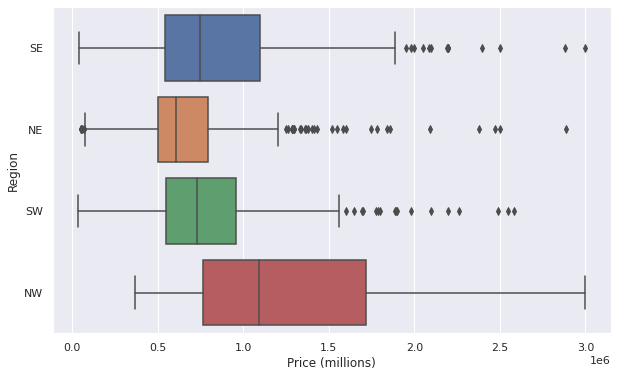

In [203]:
f, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(y='Region', x='PRICE', data=df_full_merged, ax=ax)
ax.set(xlabel = 'Price (millions)');

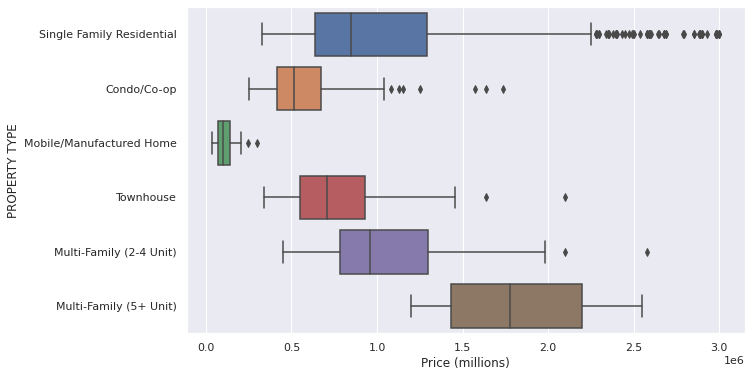

In [199]:
f, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(y='PROPERTY TYPE', x='PRICE', data=df_full_merged, ax=ax)
ax.set(xlabel = 'Price (millions)');

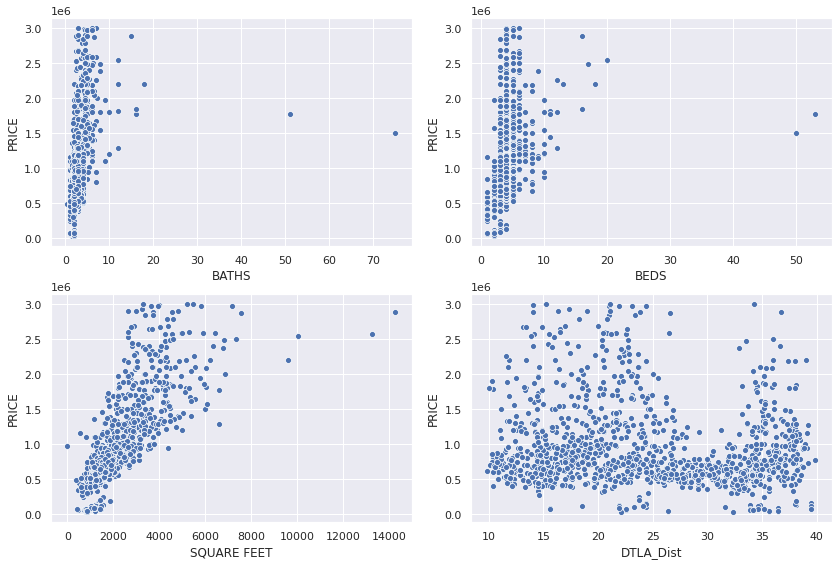

In [215]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
fig.tight_layout(pad=2.0)

sns.scatterplot(x='BATHS', y='PRICE', data=df_full_merged, ax = ax[0][0])
sns.scatterplot(x='BEDS', y='PRICE', data=df_full_merged, ax = ax[0][1])
sns.scatterplot(x='SQUARE FEET', y='PRICE', data=df_full_merged, ax = ax[1][0])
sns.scatterplot(x='DTLA_Dist', y='PRICE', data=df_full_merged, ax = ax[1][1]);

In [209]:
df_full_merged.loc[df_full_merged['BATHS'] > 20, ]

,PRICE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,BEDS,BATHS,SQUARE FEET,LATITUDE,LONGITUDE,HEALTH_IND,ED_INDEX,INCOME_IND,Rte_crim,DTLA_Dist,Region
221,1500000,Multi-Family (5+ Unit),Alhambra,91801,50.0,75.0,6000.0,34.089778,-118.143015,7.38,5.22,4.66,168.0,11.124430,SW
1203,1775000,Multi-Family (5+ Unit),Montebello,90640,53.0,51.0,3916.0,34.014782,-118.097260,7.38,3.70,3.68,336.0,14.854895,SW


In [210]:
df_full_merged.loc[df_full_merged['BEDS'] > 15, ]

,PRICE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,BEDS,BATHS,SQUARE FEET,LATITUDE,LONGITUDE,HEALTH_IND,ED_INDEX,INCOME_IND,Rte_crim,DTLA_Dist,Region
221,1500000,Multi-Family (5+ Unit),Alhambra,91801,50.0,75.0,6000.0,34.089778,-118.143015,7.38,5.22,4.66,168.0,11.124430,SW
506,2200000,Multi-Family (5+ Unit),Pasadena,91106,18.0,18.0,9600.0,34.148726,-118.126418,7.03,6.83,6.40,339.0,16.111357,NW
526,1850000,Multi-Family (2-4 Unit),Pasadena,91106,16.0,16.0,4566.0,34.148559,-118.116131,7.03,6.83,6.40,339.0,16.799489,NW
789,2888000,Single Family Residential,Covina,91724,16.0,15.0,14264.0,34.072429,-117.855777,6.15,5.12,4.93,334.0,36.757216,NE
1061,2490000,Multi-Family (5+ Unit),El Monte,91733,17.0,8.0,6826.0,34.059949,-118.033096,7.94,2.65,2.33,394.0,20.332626,SW
1203,1775000,Multi-Family (5+ Unit),Montebello,90640,53.0,51.0,3916.0,34.014782,-118.097260,7.38,3.70,3.68,336.0,14.854895,SW
1205,2550000,Multi-Family (5+ Unit),Montebello,90640,20.0,12.0,10029.0,34.011052,-118.109205,7.38,3.70,3.68,336.0,13.908843,SW


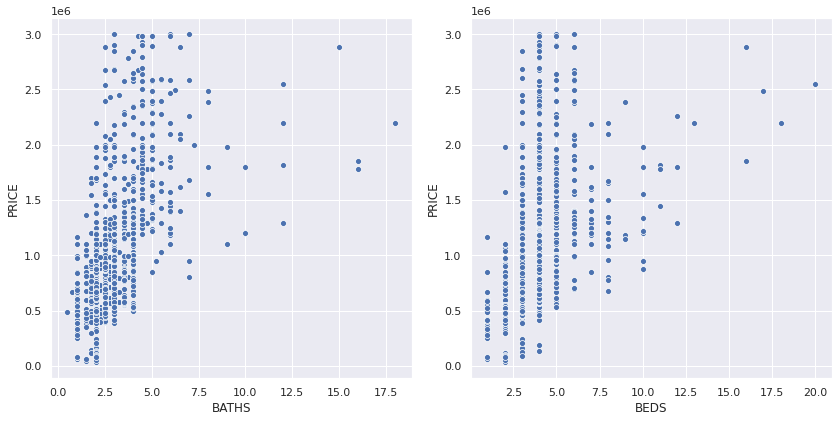

In [217]:
# Checking relationship between Price and Baths / Beds with large outliers removed. This will make relationship clearer

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.tight_layout(pad=2.0)

sns.scatterplot(x='BATHS', y='PRICE', data=df_full_merged.loc[df_full_merged['BATHS'] <= 20, ], ax = ax[0])
sns.scatterplot(x='BEDS', y='PRICE', data=df_full_merged.loc[df_full_merged['BEDS'] <= 20, ], ax = ax[1]);

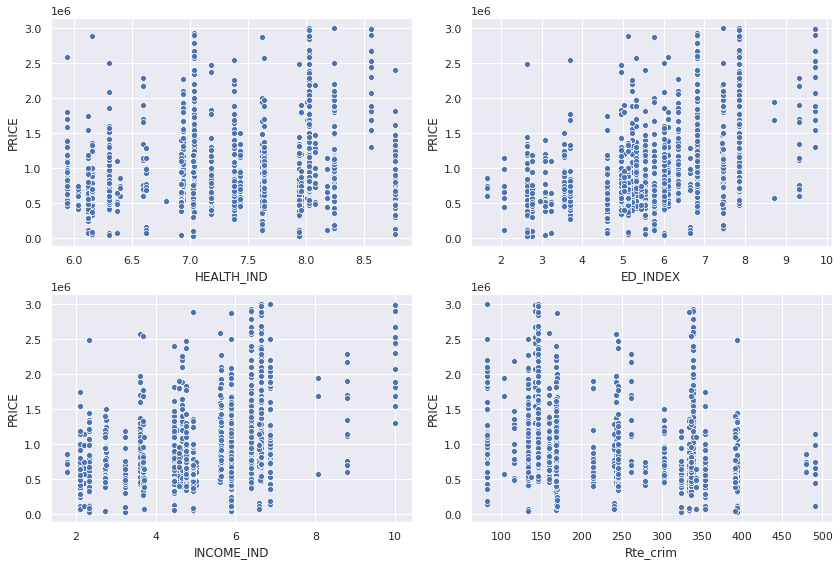

In [222]:
# Checking relationship between house prices and socioeconomic factors of the city that the property resides in

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
fig.tight_layout(pad=2.0)

sns.scatterplot(x='HEALTH_IND', y='PRICE', data=df_full_merged, ax = ax[0][0])
sns.scatterplot(x='ED_INDEX', y='PRICE', data=df_full_merged, ax = ax[0][1])
sns.scatterplot(x='INCOME_IND', y='PRICE', data=df_full_merged, ax = ax[1][0])
sns.scatterplot(x='Rte_crim', y='PRICE', data=df_full_merged, ax = ax[1][1]);